<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment-9/blob/main/Assignment_9_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [ ]:
# Uncomment the below line and Install 'mlxtend' Library if not installed already
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlxtend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving my_movies.csv to my_movies.csv


In [ ]:
data=pd.read_csv("my_movies.csv")
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [ ]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [ ]:
data.dropna(axis=1)

,V1,V2,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,1,1,0,0,0,0,0,1,0,1


In [ ]:
data.value_counts()

V1           V2     V3             V4          V5     Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  Braveheart  Green Mile
Sixth Sense  LOTR1  Harry Potter1  Green Mile  LOTR2  1            0          1      1              0        1      0              0     0           1             1
dtype: int64

## **Pre-Processing**
## AS the data is not in transaction formation we are using Transaction Encoder



In [ ]:
df=pd.get_dummies(data)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.tail()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


**Apriori Algorithm**

In [ ]:
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V4_Green Mile, Sixth Sense, V5_LOTR2, V3_Harr..."
1393,0.1,"(V4_Green Mile, Sixth Sense, V5_LOTR2, LOTR2, ..."
1394,0.1,"(V4_Green Mile, Sixth Sense, V5_LOTR2, LOTR2, ..."
1395,0.1,"(V4_Green Mile, V5_LOTR2, LOTR2, V3_Harry Pott..."


In [ ]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1.0)
rules
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(LOTR1, Harry Potter1, Green Mile, V3_Harry Po...","(Sixth Sense, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(V4_Green Mile, Sixth Sense, LOTR2, V3_Harry P...",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(LOTR1, Sixth Sense)","(V4_Green Mile, V5_LOTR2, LOTR2, Harry Potter1...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V5_LOTR2, LOTR2)","(V4_Green Mile, Sixth Sense, Harry Potter1, V2...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(Harry Potter1, V5_LOTR2)","(V4_Green Mile, Sixth Sense, LOTR2, V2_LOTR1, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
1631,"(V4_Green Mile, Green Mile)","(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
6263,"(V4_Green Mile, Green Mile, V1_Sixth Sense)","(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0
1696,"(Gladiator, Sixth Sense)","(V4_Green Mile, V1_Sixth Sense)",0.5,0.2,0.1,0.2,1.0,0.00,1.0
242,(V4_Green Mile),"(Gladiator, Sixth Sense)",0.2,0.5,0.1,0.5,1.0,0.00,1.0


In [ ]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32108,"(LOTR1, Harry Potter1, Green Mile, V3_Harry Po...","(Sixth Sense, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33436,"(V4_Green Mile, Sixth Sense, LOTR2, V3_Harry P...",(V5_LOTR2),0.1,0.1,0.1,1.0,10.0,0.09,inf
33414,"(LOTR1, Sixth Sense)","(V4_Green Mile, V5_LOTR2, LOTR2, Harry Potter1...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V5_LOTR2, LOTR2)","(V4_Green Mile, Sixth Sense, Harry Potter1, V2...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(Harry Potter1, V5_LOTR2)","(V4_Green Mile, Sixth Sense, LOTR2, V2_LOTR1, ...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V2_LOTR1, V5_LOTR2)","(V4_Green Mile, Sixth Sense, LOTR2, Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(LOTR1, V5_LOTR2)","(V4_Green Mile, Sixth Sense, LOTR2, Harry Pott...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(Harry Potter1, LOTR2)","(V4_Green Mile, Sixth Sense, V5_LOTR2, V2_LOTR...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(V2_LOTR1, LOTR2)","(V4_Green Mile, Sixth Sense, V5_LOTR2, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
52644,"(LOTR1, Sixth Sense, V1_Sixth Sense, LOTR2)","(V2_LOTR1, V4_Green Mile, V5_LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


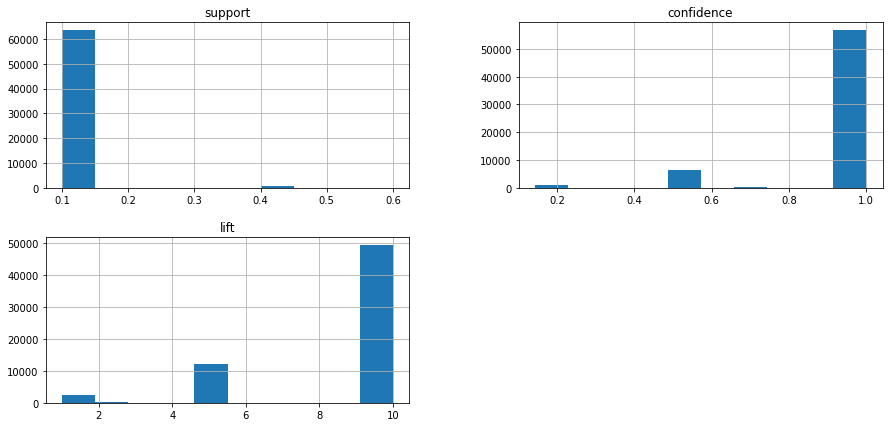

In [ ]:
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

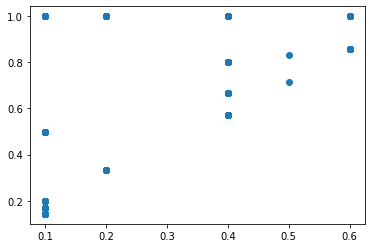

In [ ]:
plt.scatter(rules['support'],rules['confidence'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


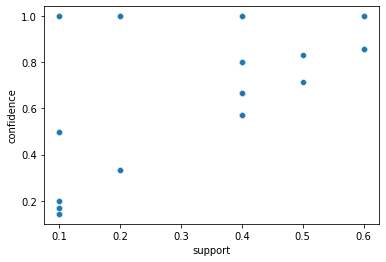

In [ ]:
import seaborn as sns

sns.scatterplot('support','confidence',data=rules)
plt.show()